# Indoor Model Propulsion

We need to find a way to estimate how much power we can expect the propulsion system to deliver in order to complete our calculations. Unfortunately, this is a very complex issue. There are many variables: rubber dimensions, winding turn count and torque, and prop blade geometry. Some of these will not be known until you have a few flights logged. What can propeller theory tell us? 

## Actuator Disk Theory


We know we will be building a propeller of some sort, and attaching a wound-up rubber motor to that propeller. The model class rules tell us something about the propeller, but for the A6 class, not much about the rubber motor. Let's start with a look at the propeller.

A common tactic in thinking about a complex topic, and propellers are certainly complex beasts, is to step back from the details of the problem and take a look at the "big picture". At that high level, the propeller's job is pretty simple: Take a bite out of the air in front of the propeller, and push that bite toward the rear at a higher speed. This simple view is complicated a bit if the propeller is moving with the vehicle, but the idea remains the same. If we reduce the propeller to a simple disk and magically have the air increase its speed as it passes through this disk, we can come up with some simple equations for what has to happen.

In [2]:
%reload_ext tikzmagic

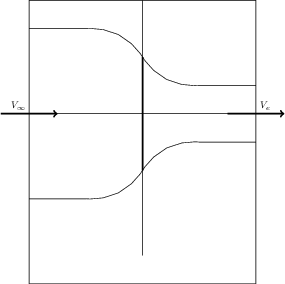

In [25]:
%%tikz
\draw (-2,7) -- (6,7) -- (6,-3) -- (-2,-3) -- cycle;
\draw (2,7) -- (2,-2);
\draw (-2,3) -- (6,3);
\draw [ultra thick,->] (-3,3) -- node[above left] {$V_\infty$}(-1,3);
\draw [ultra thick, ->](5,3) -- node[above right] {$V_e$}(7,3);
\draw [ultra thick] (2,1) -- (2,5);
\draw (-2,0) 
    -- (0,0) 
    to [bend right] (2,1) 
    to [bend left] (4,2) 
    -- (6,2);
\draw (-2,6)
    -- (0,6)
    to [bend left] (2,5)
    to [bend right] (4,4)
    -- (6,4);

We are going to assume that the mass of air entering this curved tube (this is a cross section of the circular tube) will equal the mass leaving the tube. The propeller disk will cause the velocity to jump as the air crosses this disk. From Bernoulli's equation, we can calculate the change in pressure that must occur across the disk:

We can calculate the thrust that will result by looking at the change of momentum across the disk:
    
\begin{equation}
T = \dot{m}(V_e - V_\infty)
\end{equation}

This thrust is also given by the pressure difference on either side of the disk:

\begin{equation}
T = A_{disk}(p2 - p1)
\end{equation}

The power added to this flow is equal to the change in kinetic energy;

\begin{equation}
P = \frac{1}{2} \dot{m}(V_\infty^2 - V_e^2)
\end{equation}

if this propeller disk was actually powering our model, the power it woul dbe producing is just the thrust times the velocity $V_\infty$:

\begin{equation}
P_{prop} = T V_\infty
\end{equation}

The efficiency of this propeller $\eta_p$ is the ratio on th propeller power to the power that was added to the system:

\begin{equation}
\eta_p = \frac{T V_\infty}{\dot{m}(V_\infty^2 - V_e^2)}
\end{equation}


For a model moving at velocity $V$ with a propeller rotating at speed $n$ revolutions per second, any section of the propeller has a rotational speed of $u$ = $r\omega$ = $2\pi r n$. Here, $\omega$ is the angular velocity of the propeller.

The resulting velocity vector represents a free stream velocity over the airfoil section at that radius. We set the propeller blade at some pitch angle $\gamma$, so the effective angle of attack of that propeller section is $\gamma - \alpha$. 

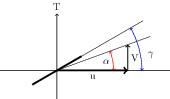

In [3]:
%%tikz -l angles

\draw (-2,0) -- (4,0);
\draw [ultra thick,->](0,0) -- node [below]{u}(2.5,0);
\draw[->] (0,-1) -- (0,2) node[above] {T};
\draw [ultra thin](0,0) -- ++(30:3.5);
\draw [ultra thin](0,0) -- ++(20:3.5);
\draw[ultra thick] (0,0) -- ++(30:1);
\draw[ultra thick] (0,0) --++(210:1);
\draw[thick, ->] (2.5,0)
    -- node[right] {V} ++(90:{2.5*tan(20)});
\draw[red,<->] (0,0)+(0:2) arc (0:20:2);
\path (0,0) -- ++ (10:1.75) node {$\alpha$}; 
\draw[blue,<->] (0,0)+(0:3) arc (0:30:3);
\path (0,0) -- ++ (10:3.125) node[right] {$\gamma$}; 

From this figure we see that:

\begin{equation}\label{eq:}
\tan{\gamma} = \frac{V}{u} = \frac{V}{2 \pi r n}
\end{equation}


If $d$ is the diameter of the propeller, then the *advance ratio* $J$ is defined as:
    
\begin{equation}
J = \frac{V}{n d}
\end{equation}

The propeller torque is defined as:

\begin{equation}
Q = \rho n^2 d^5 C_q
\end{equation}

where $C_q$ is a non-dimensional torque coefficient.

The propeller thrust is defined as:

\begin{equation}
T = \rho n^2 d^4 C_t
\end{equation}


The propeller power is defined as:

\begin{equation}
P = 2 \pi n Q = \rho n^3 d^5 C_p
\end{equation}

The efficiency of the propeller is the ratio of the power output that moves the airplane to input to power applied to the prop shaft. 

\begin{equation}
\eta = \frac{T V}{P} = \frac{T V}{2 \pi n Q} = \frac{C_t}{C_p} J
\end{equation}



